In [1]:
# %pip install opencv-python


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
import os
import urllib.request

import cv2

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

2024-10-20 23:01:44.124937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 23:01:44.140133: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 23:01:44.144838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 23:01:44.156679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 23:01:44.985742: W tensorflow/compiler/tf2

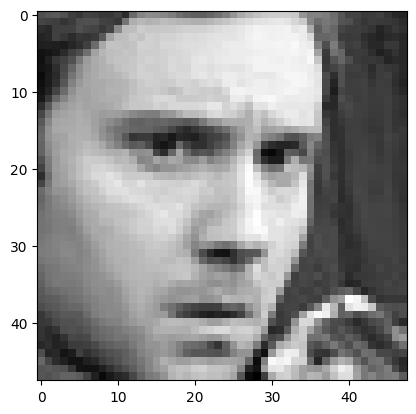

In [3]:
#example image
img = cv2.imread('./data/Images/train/Angry/0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        # horizontal_flip=True,
                                        fill_mode='nearest')
training_dataset = training_generator.flow_from_directory('./data/Images/train',
                                                            target_size = (48, 48),
                                                            batch_size = 16,
                                                            class_mode = 'categorical',
                                                            color_mode = 'grayscale')   


Found 28709 images belonging to 7 classes.


In [5]:
training_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [6]:
training_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

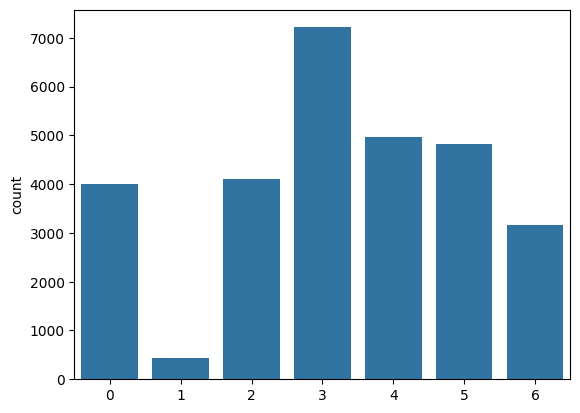

In [7]:
sns.countplot(x = training_dataset.classes);

In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('./data/Images/validation',
                                                target_size = (48, 48),
                                                batch_size = 16,
                                                class_mode = 'categorical',
                                                color_mode = 'grayscale')

Found 3589 images belonging to 7 classes.


In [9]:

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())  

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 


model.add(layers.Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Для отображения структуры модели


/home/developer/anaconda3/envs/cv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729454506.202153   34560 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729454506.240440   34560 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729454506.240710   

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,559 (1.62 MB)

 Trainable params: 422,599 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
# Освобождение GPU памяти
K.clear_session()

# Вызов очистки кэша памяти
tf.compat.v1.reset_default_graph()

# Дополнительно можно очистить память вручную с помощью метода:
tf.keras.backend.clear_session()

In [11]:
# Обучение модели
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001)

history = model.fit(training_dataset, batch_size=8,
                    epochs=200, 
                    validation_data=test_dataset,
                    callbacks=[early_stopping]
                    )



Epoch 1/200


/home/developer/anaconda3/envs/cv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729454510.208677   34690 service.cc:146] XLA service 0x7a83a4004bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729454510.208697   34690 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2024-10-20 23:01:50.258994: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 23:01:50.518081: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

   3/1795 ━━━━━━━━━━━━━━━━━━━━ 1:36 54ms/step - accuracy: 0.2257 - loss: 2.6130 

2024-10-20 23:01:53.334852: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1729454513.350555   34690 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1581/1795 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.2036 - loss: 2.2857

2024-10-20 23:04:49.723763: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads



1795/1795 ━━━━━━━━━━━━━━━━━━━━ 226s 123ms/step - accuracy: 0.2060 - loss: 2.2640 - val_accuracy: 0.2694 - val_loss: 1.8839
Epoch 2/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2571 - loss: 1.9104 - val_accuracy: 0.3288 - val_loss: 1.8014
Epoch 3/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2943 - loss: 1.8165 - val_accuracy: 0.3149 - val_loss: 1.8160
Epoch 4/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3276 - loss: 1.7381 - val_accuracy: 0.3703 - val_loss: 1.7032
Epoch 5/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3491 - loss: 1.6799 - val_accuracy: 0.4068 - val_loss: 1.6723
Epoch 6/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3840 - loss: 1.6218 - val_accuracy: 0.4076 - val_loss: 1.6275
Epoch 7/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3997 - loss: 1.5792 - val_accuracy: 0.4193 - val_loss: 1.5973
Epoch 8/200
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4159 - loss: 1.

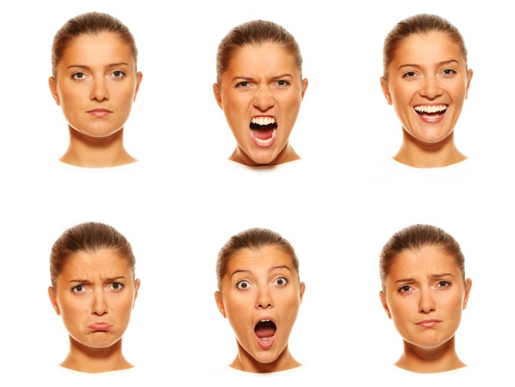

In [12]:
image = cv2.imread('./data/faces.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [13]:
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"

cascade_path = './haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, cascade_path)

detector_face = cv2.CascadeClassifier(cascade_path)

In [14]:
deteccoes = detector_face.detectMultiScale(image)
deteccoes

array([[ 54,  35, 122, 122],
       [481,  35, 118, 118],
       [475, 308, 122, 122],
       [ 52, 309, 123, 123],
       [265, 303, 124, 124],
       [487,  88, 118, 118],
       [266,  48, 122, 122]], dtype=int32)

In [15]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


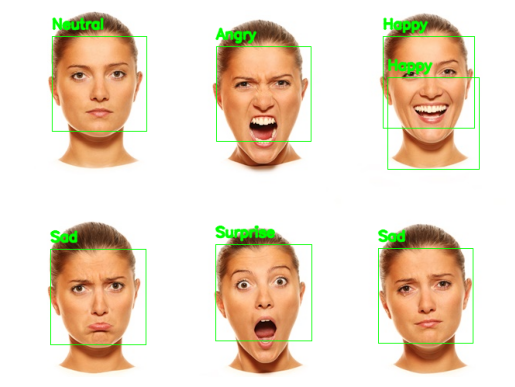

In [16]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

for (x, y, w, h) in deteccoes:

        cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 1)
        roi = image[y:y + h, x:x + w]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  
        roi_gray = cv2.resize(roi_gray, (48, 48)) 
        roi_gray = np.expand_dims(roi_gray, axis=-1) 
        roi_gray = roi_gray / 255.0  
        roi_gray = np.expand_dims(roi_gray, axis=0)  

        forecasts = model.predict(roi_gray) 

        cv2.putText(image, emotions[np.argmax(forecasts)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(rgb_image)
plt.axis('off')
plt.show()        